*von Marthe Zeja (590649)*

# Physikalische Grundlagen

Die Bewegung eines Geschosses mit einem Abwurf-Winkel $\theta$ zur Horizontalen, einer Anfangsgeschwindigkeit $v_0$ und der Abwurfhöhe $y_0$ kann zunächst komponentenweise betrachtet werden. Die Ort-Zeit-Gesetze für die jeweilige Richtung lauten bekannterweise 

$$x(t)=v_0 \cdot cos(\theta)\cdot t$$
und
$$y(t)=y_0 + v_0 \cdot sin(\theta)\cdot t-\frac{1}{2}\cdot g\cdot t^2$$

wobei $g$ die Fallbeschleunigung darstellt.\
Zur Bestimmung der Bahnkurve $y(x)$ wird $t$ durch Umstellung der Gleichungen eliminiert und wir erhalten

$$y(x)=y_0+tan(\theta)\cdot x - \frac{g\cdot x^2}{2\cdot v_0^2\cdot cos^2(\theta)}.$$





# Analyse einer Wurfparabel in Abhängigkeit des Abwurfwinkels


In [29]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
%matplotlib inline

Zunächst werden die Werte der Abwurfhöhe auf $y_0=6.49$ m (letzten drei Ziffern der Matrikelummer) und die Fallbeschleunigung auf $g=9.81$ m/s festgelegt.
Die Variablen X_LIM und Y_LIM dienen zur späteren Anpassung des Plots.

In [30]:
#Konstanten
Y_0 = 6.49 #in Meter
G = 9.81
X_LIM = 0
Y_LIM = 0

Im Folgenden werden Behilfsfunktionen erstellt, um die spätere Berechnung der Wurfparabel übersichtlicher zu machen.

In [31]:
def generate_initial_velocity():
    '''Generiert eine zufällige Anfangsgeschwindigkeit zwischen 10 m/s und 20 m/s.'''
    return 10 + 10*rand()

def find_nearest(array, value): #wird später für die Suche der Schnittpunkte der Wurfbahn mit der x-Achse benutzt
    '''Gibt den Index des Wertes eines Arrays aus, der am dichtesten am vorgegebenen Wert liegt.'''
    idx = (np.abs(array - value).argmin())
    return idx

def update_max_values(x_array, y_array):
    '''Updated die globalen Werte von X_LIM und Y_LIM zur späteren Verwendung in plt'''
    global X_LIM, Y_LIM
    
    if max(y_array) > Y_LIM:
        Y_LIM = max(y_array)
        
    idx = find_nearest(y, 0)
    if x_array[idx] > X_LIM:
        X_LIM = x_array[idx]

def deg_to_rad(theta):
    '''Gibt einen degree-Wert als radiant-Wert aus.'''
    return theta * np.pi / 180

Nun wird die oben eingeführte Wurfparabel-Formeln benutzt, um für einen festgelegten Bereich von x-Werten (x = 0 ... 100m) die dazugehörigen y-Werte zu berechnen. 

In [32]:
def get_trajectory_array(y_0, theta, v_0):
    '''Gibt die Wurfparabel für gegebene Werte von Anfangsgeschwindigkeit, Abwurfhöhe und Abwurfwinkel aus.'''
    x = np.linspace(0, 101, 10000)
    y = y_0 + np.tan(deg_to_rad(theta)) * x - G * (x ** 2) / (2 * v_0 ** 2 * (np.cos(deg_to_rad(theta))) ** 2)
    return x, y

Anschließend kann mit Hilfe der oben definierten Funktionen die Wurfparabeln in Abhängigkeit von einem Abwurfwinkel von $\theta=10^\circ ... 80^\circ$ dargestellt werden. Der Plotbereich der x- wie auch y-Achse wird auf den Bereich der ausgegebenen Graphen beschränkt.

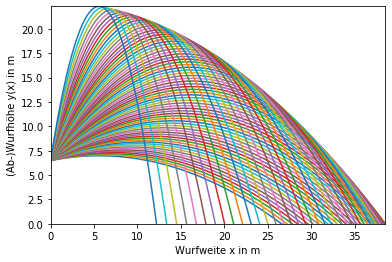

In [33]:
v_0 = generate_initial_velocity() #generiert zufällige Anfangsgeschwindigkeit
angle_distance_list = [] #Variable zur Aufbewahrung von (theta, längste_x_distance)-Tupel

for theta in range(10, 81):
    x, y = get_trajectory_array(Y_0, theta, v_0)
    index = find_nearest(y, 0)
    angle_distance_list.append((theta, x[index])) #packt die (theta, längste_x_distance)-Tupel in die Liste angle_distance_list
    update_max_values(x, y)
    plt.plot(x, y)
    
plt.ylim(0, Y_LIM)
plt.xlim(0, X_LIM)
plt.xlabel("Wurfweite x in m")
plt.ylabel("(Ab-)Wurfhöhe y(x) in m")
plt.show()

Die maximale Flugweite (und der dazugehörige Abwurfwinkel) kann durch die Ermittlung des größten x-Wertes in der zuvor angelegten Tupel-Liste ausgegeben werden.

In [34]:
max_x = max(angle_distance_list, key = lambda t: t[1])[1]
max_theta = max(angle_distance_list, key = lambda t: t[1])[0]
print(f'Bei einer Anfangsgeschwindigkeit von v = {round(v_0, 2)} m/s bträgt die größtmöglichste Flugweite x = {round(max_x,2)} m.')
print(f'Das Geschoss wurde dabei unter einem Winkel von theta = {max_theta} degree abgeworfen.')

Bei einer Anfangsgeschwindigkeit von v = 17.88 m/s bträgt die größtmöglichste Flugweite x = 38.56 m.
Das Geschoss wurde dabei unter einem Winkel von theta = 40 degree abgeworfen.
